<a href="https://colab.research.google.com/github/Danielhabayomi/pythonproject/blob/main/Chinook_DB_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%load_ext sql

In [ ]:
%sql sqlite:////content/drive/MyDrive/Chinook/chinook.db

In [ ]:
%%sql
SELECT name FROM sqlite_master WHERE type='table' AND name NOT LIKE 'sqlite_%';

 * sqlite:////content/drive/MyDrive/Chinook/chinook.db
Done.


name
Album
Artist
Customer
Employee
Genre
Invoice
InvoiceLine
MediaType
Playlist
PlaylistTrack


In [ ]:
# Connect to the SQLite database again
conn = sqlite3.connect('/content/drive/MyDrive/Chinook/chinook.db')

In [ ]:
import sqlite3
import pandas as pd

## **Task 1: Analyzing Invoices by Country**

In [ ]:

biling_country = '''
SELECT BillingCountry, COUNT(InvoiceId) AS TotalInvoices
FROM Invoice
GROUP BY BillingCountry
ORDER BY TotalInvoices DESC
'''
df_biling_country = pd.read_sql_query(biling_country, conn)
print("biling_country:")
print(df_biling_country)

#After querying the database to find out Countries with the highest invoices, the top 5 came out to be USA, CANADA, FRANCE, BRAZIL, GERMANY and UNITED KINGDOM in the same order, ranging from the highest 91 to the lowest 21

biling_country:
    BillingCountry  TotalInvoices
0              USA             91
1           Canada             56
2           France             35
3           Brazil             35
4          Germany             28
5   United Kingdom             21
6         Portugal             14
7   Czech Republic             14
8            India             13
9           Sweden              7
10           Spain              7
11          Poland              7
12          Norway              7
13     Netherlands              7
14           Italy              7
15         Ireland              7
16         Hungary              7
17         Finland              7
18         Denmark              7
19           Chile              7
20         Belgium              7
21         Austria              7
22       Australia              7
23       Argentina              7


### **Task 2: Identifying the City with the Best Customers**

In [ ]:

best_customers = '''
SELECT Invoice.BillingCity, SUM(Invoice.Total) AS TotalSales
FROM Invoice
GROUP BY Invoice.BillingCity
ORDER BY TotalSales DESC
LIMIT 1
'''
df_best_customers = pd.read_sql_query(best_customers, conn)
print("best_customers:")
print(df_best_customers)

#The city with the best customers is Prague with a total of 90.24 sales

best_customers:
  BillingCity  TotalSales
0      Prague       90.24


### **Task 3: Total Sales Time Series**

In [ ]:

total_sales = '''
SELECT strftime('%Y-%m', InvoiceDate) AS Month, SUM(Total) AS TotalSales
FROM Invoice
GROUP BY strftime('%Y-%m', InvoiceDate)
'''
df_total_sales = pd.read_sql_query(total_sales, conn)
print("total_sales (Total Sales Time Series):")
print(df_total_sales)

#Total sales shows a consistent flow for the period of a year and has since then shows sudden increase in total sales in some months and dropped in other months but maintained going below the 35.64 benchmark it started with

total_sales (Total Sales Time Series):
      Month  TotalSales
0   2009-01       35.64
1   2009-02       37.62
2   2009-03       37.62
3   2009-04       37.62
4   2009-05       37.62
5   2009-06       37.62
6   2009-07       37.62
7   2009-08       37.62
8   2009-09       37.62
9   2009-10       37.62
10  2009-11       37.62
11  2009-12       37.62
12  2010-01       52.62
13  2010-02       46.62
14  2010-03       44.62
15  2010-04       37.62
16  2010-05       37.62
17  2010-06       37.62
18  2010-07       37.62
19  2010-08       37.62
20  2010-09       36.63
21  2010-10       37.62
22  2010-11       37.62
23  2010-12       37.62
24  2011-01       37.62
25  2011-02       37.62
26  2011-03       37.62
27  2011-04       51.62
28  2011-05       42.62
29  2011-06       50.62
30  2011-07       37.62
31  2011-08       37.62
32  2011-09       37.62
33  2011-10       37.62
34  2011-11       23.76
35  2011-12       37.62
36  2012-01       37.62
37  2012-02       37.62
38  2012-03       37.62
3

### **Task 3: Total Rock Sales Time Series**

In [ ]:
total_sales_rock = '''
SELECT strftime('%Y-%m', InvoiceDate) AS Month, SUM(Invoice.Total) AS TotalRockSales
FROM Invoice
JOIN InvoiceLine ON Invoice.InvoiceId = InvoiceLine.InvoiceId
JOIN Track ON InvoiceLine.TrackId = Track.TrackId
JOIN Genre ON Track.GenreId = Genre.GenreId
WHERE Genre.Name = 'Rock'
GROUP BY strftime('%Y-%m', InvoiceDate)
'''
df_total_sales_rock = pd.read_sql_query(total_sales_rock, conn)
print("\total_sales_rock (Rock Genre Sales Time Series):")
print(df_total_sales_rock)

#TotalRocksales however has a much higher total sales and has an inconsistent flow, flunctuating from as high as 201.96 to as low as 17.82

	otal_sales_rock (Rock Genre Sales Time Series):
      Month  TotalRockSales
0   2009-01           99.99
1   2009-02           97.02
2   2009-03           78.21
3   2009-04          175.23
4   2009-05           59.40
5   2009-06          114.84
6   2009-07          168.30
7   2009-08          122.76
8   2009-09           69.30
9   2009-10          198.99
10  2009-11          189.09
11  2009-12          188.10
12  2010-01          170.73
13  2010-02          143.63
14  2010-03           37.64
15  2010-04          122.76
16  2010-05           42.57
17  2010-06           83.16
18  2010-07          201.96
19  2010-08           77.22
20  2010-09          116.82
21  2010-10          138.60
22  2010-11          160.38
23  2010-12           69.30
24  2011-01          195.03
25  2011-02          215.82
26  2011-03          202.95
27  2011-04          131.16
28  2011-05          179.34
29  2011-06           38.62
30  2011-07          126.72
31  2011-08           41.58
32  2011-09          128.70

### **Task 4: Six Months Sales Forecasting**

In [ ]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import matplotlib.pyplot as plt

In [ ]:
# Get the current timezone
import pytz
tz = pytz.utc

# Create the date range with the timezone information
df_total_sales2['Month'] = pd.to_datetime(df_total_sales2['Month'])

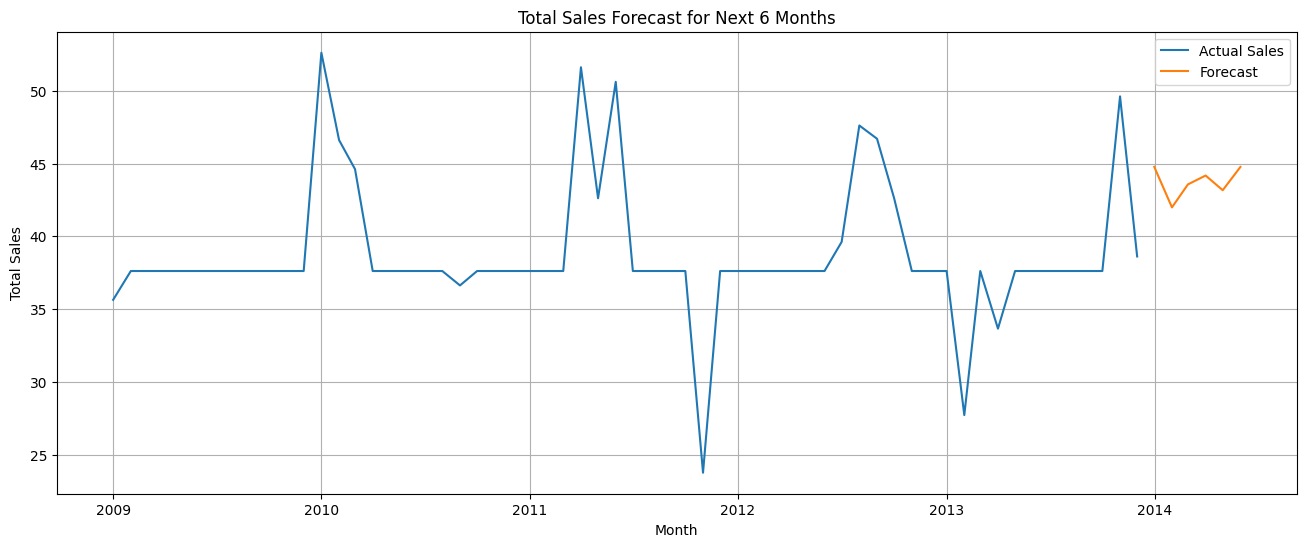

In [ ]:
# Using Exponential Smoothing for forecasting
# Exponential smoothing offers a practical approach to forecasting for data with highs and lows, providing a balance between simplicity and effectiveness in capturing underlying trends.

model = ExponentialSmoothing(df_total_sales2['TotalSales'], trend='add', seasonal='add', seasonal_periods=12)
model_fit = model.fit()
forecast = model_fit.forecast(6)

# Plotting the forecast
plt.figure(figsize=(16, 6))
plt.plot(df_total_sales2['Month'], df_total_sales2['TotalSales'], label='Actual Sales')
plt.plot(pd.date_range(start=df_total_sales2['Month'].iloc[-1], periods=6, freq='M'), forecast, label='Forecast')
plt.title('Total Sales Forecast for Next 6 Months')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.legend()
plt.grid()
plt.show()

#Forecast shows continuation in the inconsistent pattern of total sales, starting from as high as 45 and it's lowest dip in the second month as low as 42 and increasing back to 45 at the last month.

### **Close the connection**

In [ ]:
conn.close()